In [2]:
from exp import *

import torchvision

In [35]:
from scipy.fftpack import fft, dct, idct


In [3]:
dm = DatasetManager('2017',224,'all','2017')

In [96]:
train_images = dm.get_dataset_path('train_images')

In [143]:
img = open_image(train_images.ls()[0])

In [144]:
n_img = img.data.numpy()

In [145]:
n_img.shape

(3, 224, 298)

In [146]:
r,g,b = n_img

In [147]:
dct_r = dct2(r)
dct_g = dct2(g)
dct_b = dct2(b)




In [148]:
t_r = torch.from_numpy(dct_r)
t_g = torch.from_numpy(dct_g)
t_b = torch.from_numpy(dct_b)

torch.Size([224, 298])

In [152]:
dct_img = torch.stack((t_r,t_g,t_b)) # revisar

In [153]:
dct_img.shape

torch.Size([3, 224, 298])

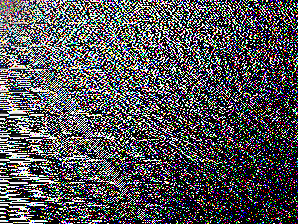

In [155]:
torchvision.transforms.ToPILImage()(dct_img)

In [195]:
np.sum(dct_r / 1.05 > 1)

12

In [193]:
dct_r.shape

(224, 298)

In [196]:

def quantizador(x):
    return np.round(x / 10) * 10


rec_r = idct2(quantizador(dct_r))
rec_g = idct2(quantizador(dct_g))
rec_b = idct2(quantizador(dct_b))


t_rec_r = torch.from_numpy(rec_r)
t_rec_g = torch.from_numpy(rec_g)
t_rec_b = torch.from_numpy(rec_b)

In [197]:
reconstructed = torch.stack((t_rec_r,t_rec_g,t_rec_b)) 

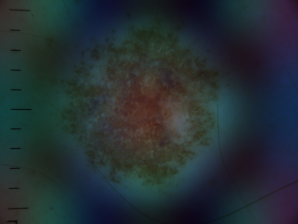

In [218]:
torchvision.transforms.ToPILImage()((1 - reconstructed) * img.data)

In [203]:
img.shape

torch.Size([3, 224, 298])

In [134]:
mat = np.random.randint([[4,4],[4,4]]); mat

array([[1, 2],
       [2, 2]])

In [128]:
mat.T

array([0, 1])

In [125]:
idct(dct(mat))

array([4.440892e-16, 4.000000e+00])

In [140]:
def dct2 (block):
    return dct(dct(block.T, norm = 'ortho').T, norm = 'ortho')

def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

In [142]:
idct2(dct2(mat))

array([[1., 2.],
       [2., 2.]])

In [141]:
mat

array([[1, 2],
       [2, 2]])